In [168]:
# @title imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer

In [98]:
!pip install faker
from faker import Faker
fake = Faker()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]

In [100]:
# @title create dataset
# of villagers: name, income, house_size - (str, gbp, sq. feet)
def create_dataset(population):
  population = population
  mean_income = 65000
  income_std = 15000
  mean_area = 10000
  area_std = 5000

  names = [fake.name() for i in range(population)]
  income = abs(np.random.normal(mean_income, income_std, population))
  house_size = abs(np.random.normal(mean_area, area_std, population))
  return pd.DataFrame({'name':names, 'income':income, 'area':house_size})

In [101]:
df = create_dataset(300)
df.head(3)

,name,income,area
0,Blake Lee,58115.683450,12349.130556
1,Todd Thomas Jr.,56507.817057,16928.803085
2,Cody Harrison,44846.167996,14031.654020


In [102]:
print(df.shape)
df.describe()

(300, 3)


,income,area
count,300.000000,300.000000
mean,64864.235536,9654.683159
std,13686.102321,4731.294514
min,26569.159559,114.657737
25%,54752.791902,6804.448822
50%,65275.243743,9849.054960
75%,75103.470180,12659.793362
max,106871.702921,28218.860755


In [181]:
# @title clustering function
def cluster(k, data, algo):
  data = data[['income', 'area']]
  if algo == 'kmeans':
    model = KMeans(n_clusters=k)
  
  if algo == 'agglomerative':
      model = AgglomerativeClustering(n_clusters=k)

  labels = model.fit_predict(data)
  # add cluster labels to original df
  global df
  df = df.assign(cluster=labels)

  # Plot the results
  plt.scatter(data['income'], data['area'], c=labels)
  plt.xlabel('income')
  plt.ylabel('area')
  plt.title('Cluster Analysis')
  plt.show()

In [189]:
# plotting function with cluster label
def plot_cluster(data):
   # Plot data points with cluster memberships
  sns.scatterplot(x='income', y='area', data=data, hue='cluster', s=100)
  plt.legend(loc='upper left')
  plt.title('Cluster Analysis')
  plt.show()

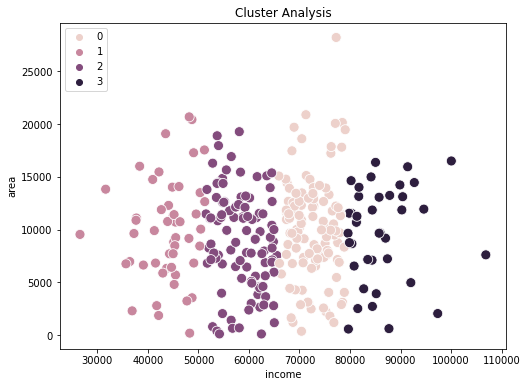

In [190]:
plot_cluster(df)

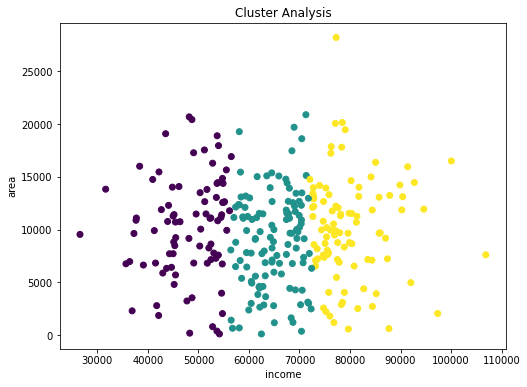

In [183]:
# @title cluster raw data
cluster(3, df, 'kmeans')

In [184]:
df

,name,income,area,cluster
0,Blake Lee,58115.683450,12349.130556,1
1,Todd Thomas Jr.,56507.817057,16928.803085,0
2,Cody Harrison,44846.167996,14031.654020,0
3,Hannah Wood DVM,53946.048354,7593.191414,0
4,Elizabeth Anderson,75241.746512,2230.441614,2
...,...,...,...,...
295,James Smith DDS,53978.392472,17966.361349,0
296,Tara Porter,73600.700966,7232.136437,2
297,Jeffery Lowe,79889.021566,8771.721895,2
298,Kara Marquez,45332.420791,8483.931311,0


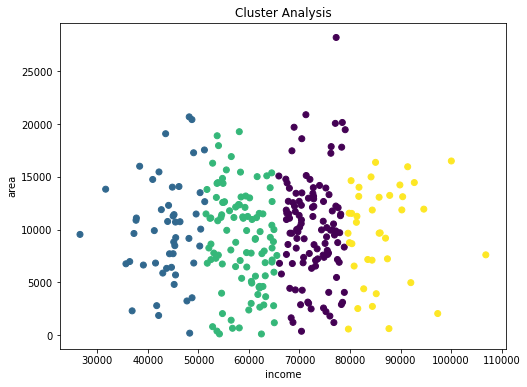

In [185]:
cluster(4, df, 'kmeans')

<AxesSubplot:>

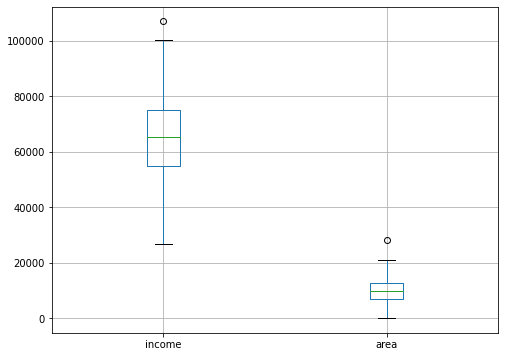

In [121]:
df1 = df[['income', 'area']]
df1.boxplot()

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

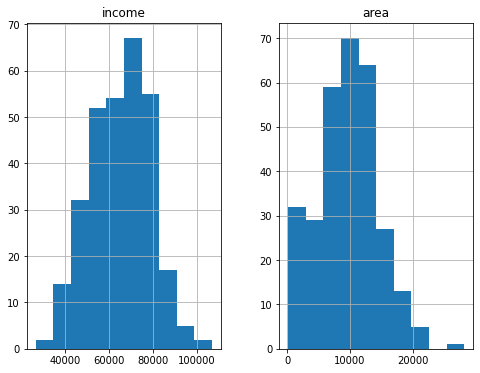

In [122]:
df1.hist()

In [123]:
# @title normalisation
def normalise(data, method):
  X = data.values  # a np array of values
  if method == 'minmax':
    scaler = MinMaxScaler()
  elif method == 'std':
    scaler = StandardScaler()
  elif method == 'log':
    scaler = FunctionTransformer(np.log1p)
  elif method == 'sqrt':
    scaler = FunctionTransformer(np.sqrt)
  X_scaled = scaler.fit_transform(X)
  return pd.DataFrame(X_scaled, columns=df1.columns)

In [124]:
df_norm = normalise(df1, 'minmax')
df_norm.head()

,income,area
0,0.392846,0.435325
1,0.372823,0.598279
2,0.227602,0.495193
3,0.340922,0.266100
4,0.606115,0.075284


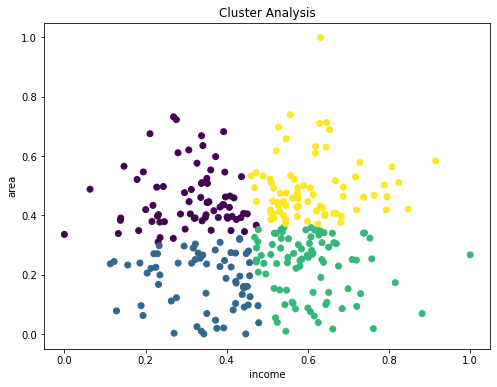

In [128]:
# @title cluster normalised data
cluster(4, df_norm, 'kmeans')

In [159]:
# @title further analysis of cluster
df['cluster'].value_counts()

0    105
2     88
1     81
3     26
Name: cluster, dtype: int64

In [160]:
df_cluster0 = df[df['cluster']==0]
df_cluster0.head()

,name,income,area,cluster
2,Cody Harrison,44846.167996,14031.654020,0
5,Dominique Elliott,77566.684869,8775.799320,0
6,Dustin Mitchell,50334.755216,13508.592025,0
9,Chelsea Oneal,67795.377921,12691.918420,0
16,Thomas Carroll,51758.495011,6822.403577,0


<AxesSubplot:>

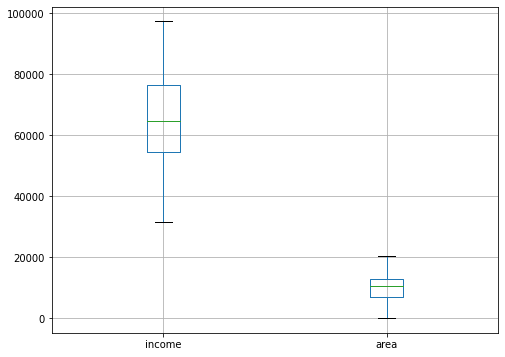

In [161]:
df_cluster0[['income','area']].boxplot()

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

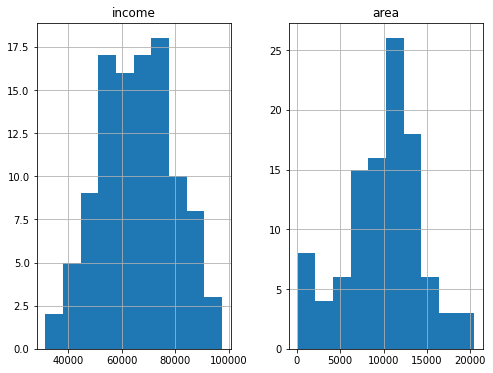

In [162]:
df_cluster0[['income','area']].hist()

In [163]:
# plus any other type of analysis. 
# similarly for other clusters
# and cross-cluster analysis

In [129]:
# @title standardise
df_std = normalise(df1, 'std')
df_std.head()

,income,area
0,-0.493919,0.570446
1,-0.611597,1.540017
2,-1.465100,0.926656
3,-0.799090,-0.436442
4,0.759519,-1.571799


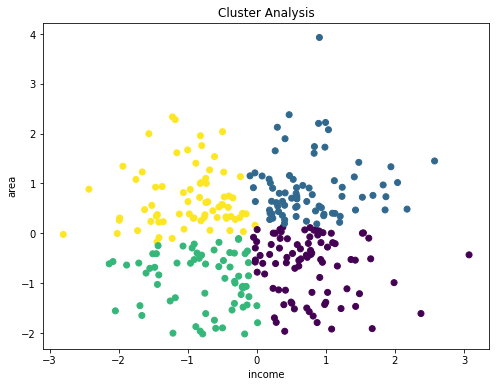

In [130]:
# @title cluster standardised data
cluster(4, df_std, 'kmeans')

In [140]:
# @title effect of outliers
# Toggle the population in create_dataset(population) and study the effects from the cells below
df2 = create_dataset(300)
df2.head()

,name,income,area
0,Rodney Shaw,78810.141551,8055.053065
1,Seth Livingston,79768.144470,17022.380069
2,James Jones,65703.917949,5192.558899
3,Jorge Chandler,54242.716830,10150.802904
4,Erin Parker,78307.399412,13951.000769


In [145]:
# add an extreme outlier
df2.loc[0, 'income'] = 200000
df2_num = df2[['income', 'area']]
df2_num.head()

,income,area
0,200000.000000,8055.053065
1,79768.144470,17022.380069
2,65703.917949,5192.558899
3,54242.716830,10150.802904
4,78307.399412,13951.000769


<AxesSubplot:>

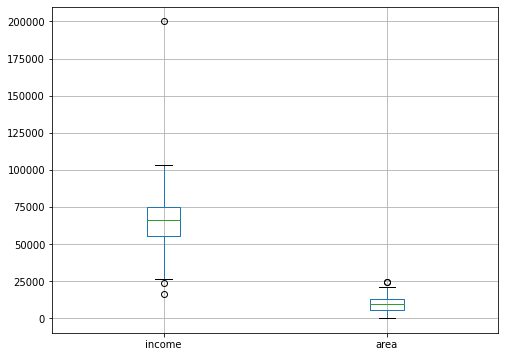

In [146]:
df2_num.boxplot()

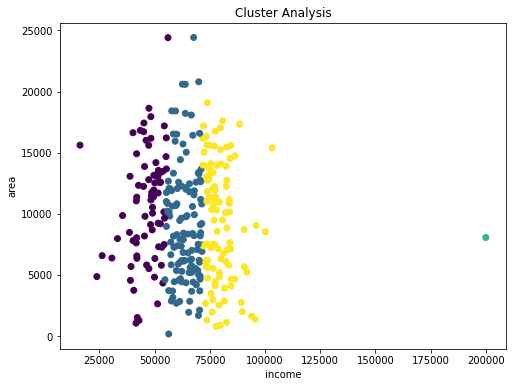

In [147]:
cluster(4, df2, 'kmeans')

In [148]:
# normalise
df2_norm = normalise(df2_num, 'minmax')
df2_norm.head()

,income,area
0,1.000000,0.325336
1,0.345620,0.694990
2,0.269074,0.207337
3,0.206694,0.411728
4,0.337670,0.568380


<AxesSubplot:>

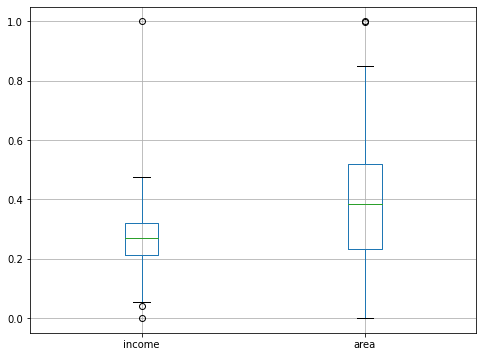

In [149]:
df2_norm.boxplot()

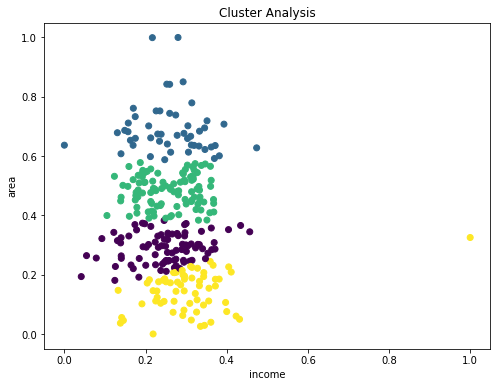

In [150]:
cluster(4, df2_norm, 'kmeans')

In [152]:
# normalise: log transform
df2_log = normalise(df2_num, 'log')
df2_log.head()

,income,area
0,12.206078,8.994179
1,11.286892,9.742343
2,11.092929,8.555174
3,10.901242,9.225407
4,11.268410,9.543378


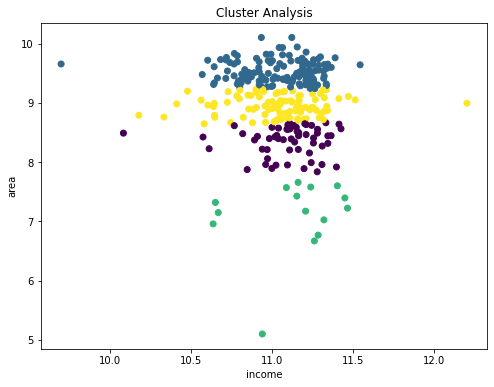

In [153]:
# cluster
cluster(4, df2_log, 'kmeans')

In [154]:
# normalise: sqrt transform
df2_sqrt = normalise(df2_num, 'sqrt')
df2_sqrt.head()

,income,area
0,447.213595,89.749947
1,282.432549,130.469844
2,256.327755,72.059412
3,232.900659,100.751193
4,279.834593,118.114355


<AxesSubplot:>

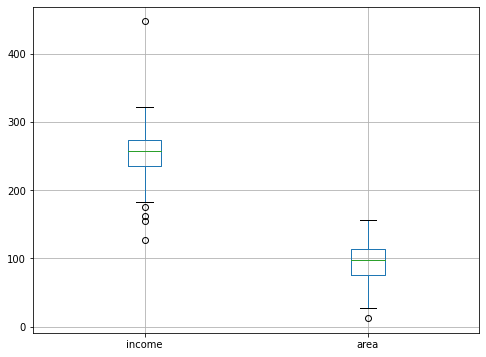

In [155]:
df2_sqrt.boxplot()

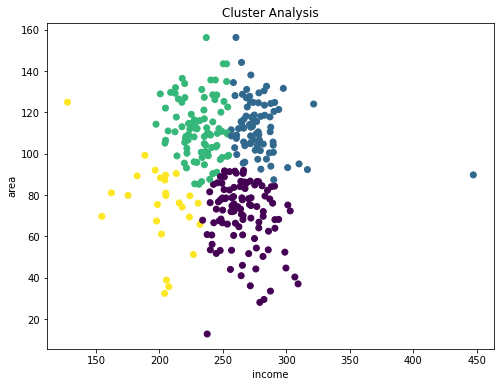

In [156]:
# cluster
cluster(4, df2_sqrt, 'kmeans')